In [1]:
# import libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plotting
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

In [2]:
# import graph
G = nx.read_adjlist('./download.tsv.contiguous-usa/contiguous-usa/out.contiguous-usa',comments='%')

## Key

1: Alabama
2: Florida
3: Georgia
4: Mississippi
5: Tennessee
6: Arkansas
7: Louisiana
8: Missouri
9: Oklahoma
10: Texas
11: Arizona
12: California
13: New Mexico
14: Nevada
15: Utah
16: Oregon
17: Colorado
18: Kansas
19: Nebraska
20: Wyoming
21: Connecticut
22: Massachussets
23: New York
24: Rhode Island
25: District of Columbia
26: Maryland
27: Virginia
28: Delaware
29: New Jersey
30: Pennsylvania
31: North Carolina
32: South Carolina
33: Iowa
34: Illinois
35: Minnesota
36: South Dakota
37: Wisconsin
38: Idaho
39: Montana
40: Washington
41: Indiana
42: Kentucky
43: Michigan
44: Ohio
45: West Virginia
46: New Hampshire
47: Vermont
48: Maine
49: North Dakota

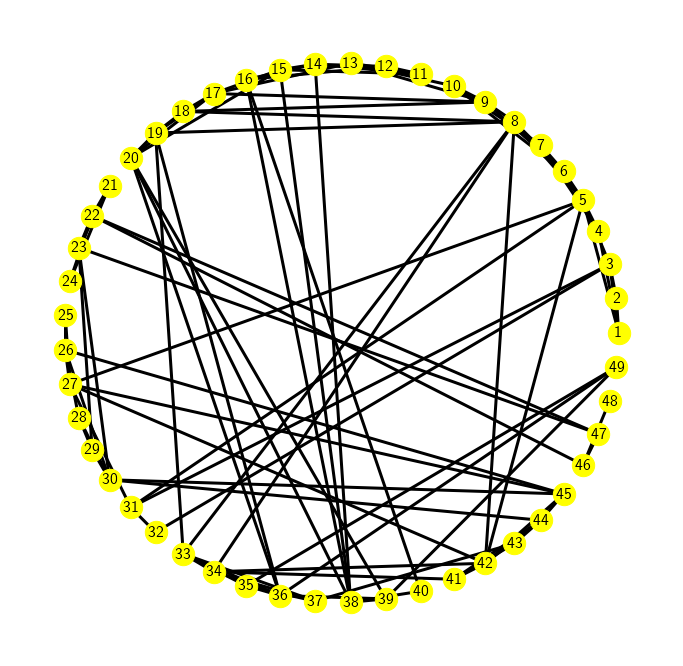

In [3]:
# Draw the network

# We define here a small function to draw a network to save some space 
def quick_draw(G):
    plt.figure(figsize = (12,12))

    pos = nx.circular_layout(G)

    nx.draw_networkx(G, 
                     pos = pos, 
                     with_labels = True, 
                     node_color = 'yellow',
                     node_size=500, 
                     font_size=16, 
                     width=3) 
    plt.axis('off')
    
quick_draw(G)

In [4]:
# Basic properties
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

# Degree sequence
degrees = dict(G.degree())
degrees = np.array(list(degrees.values()))
print('Nodes degrees = ', degrees)

Number of nodes: 49
Number of edges: 107
Nodes degrees =  [4 2 5 4 8 6 3 8 6 4 4 3 4 5 5 4 6 4 6 6 3 5 5 2 2 5 6 3 3 6 4 2 6 5 4 6 4
 6 4 2 4 7 3 5 5 3 3 1 3]


In [5]:
# function to calculate the degree distribution of a graph
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  
    vk = np.array(vk)        # store degree values in array
    
    maxk = np.max(vk)
    k = np.arange(0,maxk+1) # possible values of k
    
    pk = np.zeros(maxk+1) # degree distribution p(k)
    for i in vk:
        pk[i] = pk[i] + 1
    pk = pk/sum(pk) # the sum of the elements of P(k) must to be equal to one
    
    return k,pk

# Degree distribution moments
def deg_dist_moments(G,n):
    k,pk = degree_distribution(G)
    sol = sum((k**n)*pk)
    return sol

[0.         0.02040816 0.10204082 0.18367347 0.24489796 0.18367347
 0.20408163 0.02040816 0.04081633]


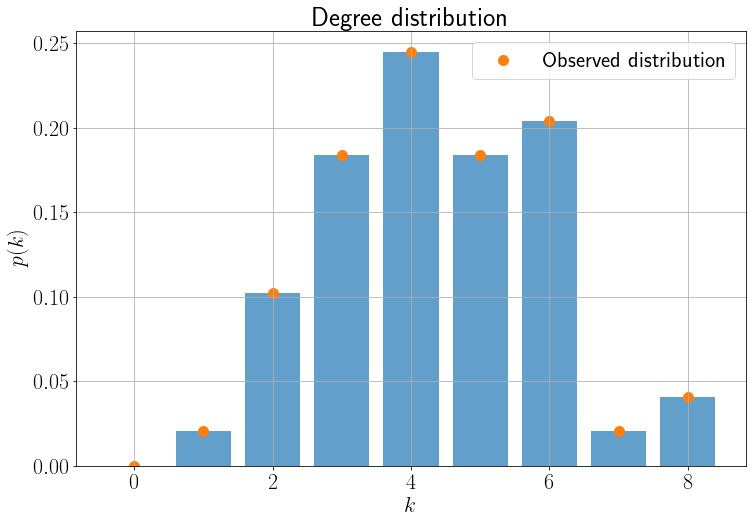

In [6]:
# Degree Distribution
[ks, degdist] = degree_distribution(G)
print(degdist)

# plotting
fig = plt.figure(figsize = (12,8))
plt.bar(ks, degdist, alpha=0.7)
plt.scatter(ks, degdist, s=100, label='Observed distribution')
#plt.plot(ks, poisdist, 'k--', label='Pois($z$) distribution')
plt.xlabel("$k$")
plt.ylabel("$p(k)$")
plt.title("Degree distribution")
plt.legend(loc=0)
plt.grid()

In [7]:
# Degree distribution moments and variance
k1 = deg_dist_moments(G,1)
k2 = deg_dist_moments(G,2)
print("First moment of the degree distribution = %.3f" % k1)
print("Second moment of the degree distribution = %.3f" % k2)
print("Degree variance = %.3f" % (k2 - k1**2))

First moment of the degree distribution = 4.367
Second moment of the degree distribution = 21.551
Degree variance = 2.477


In [8]:
# Average shortest paths and diameter
avg_D = nx.average_shortest_path_length(G)
print("Average shortest path length: %.3f" % avg_D)

d = nx.diameter(G)
print('Diameter (maximum shortest path) = ', d)

Average shortest path length: 4.163
Diameter (maximum shortest path) =  11


In [9]:
# Centralities
Eigenvector = list(nx.eigenvector_centrality(G).values())
Closeness = list(nx.closeness_centrality(G).values())
Betweenness = list(nx.betweenness_centrality(G).values())
Katz = list(nx.katz_centrality(G).values())

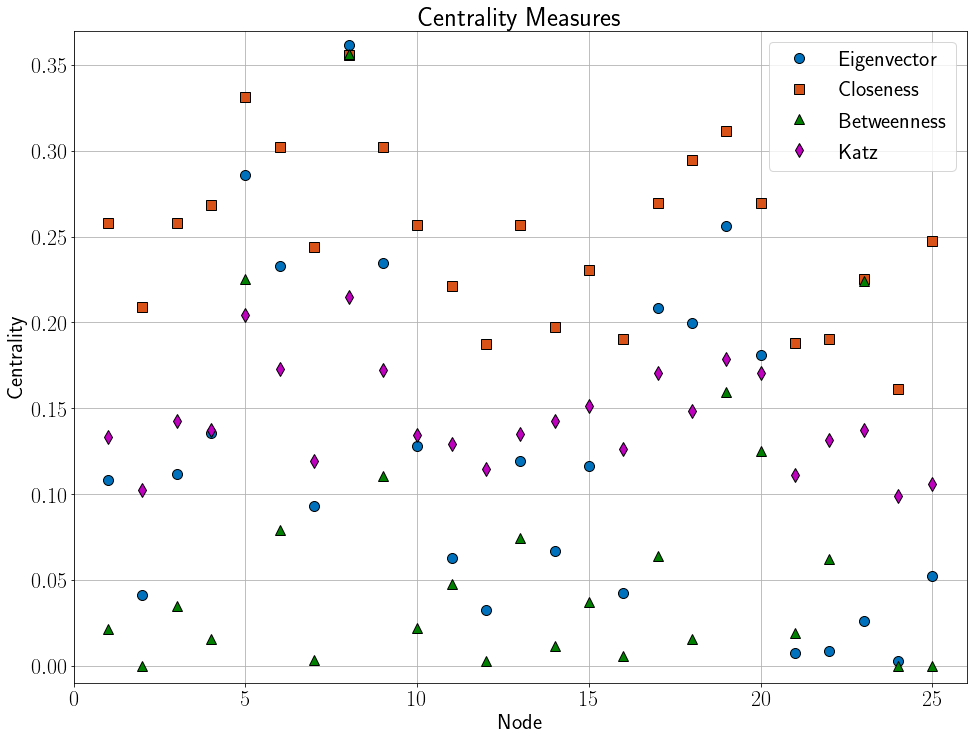

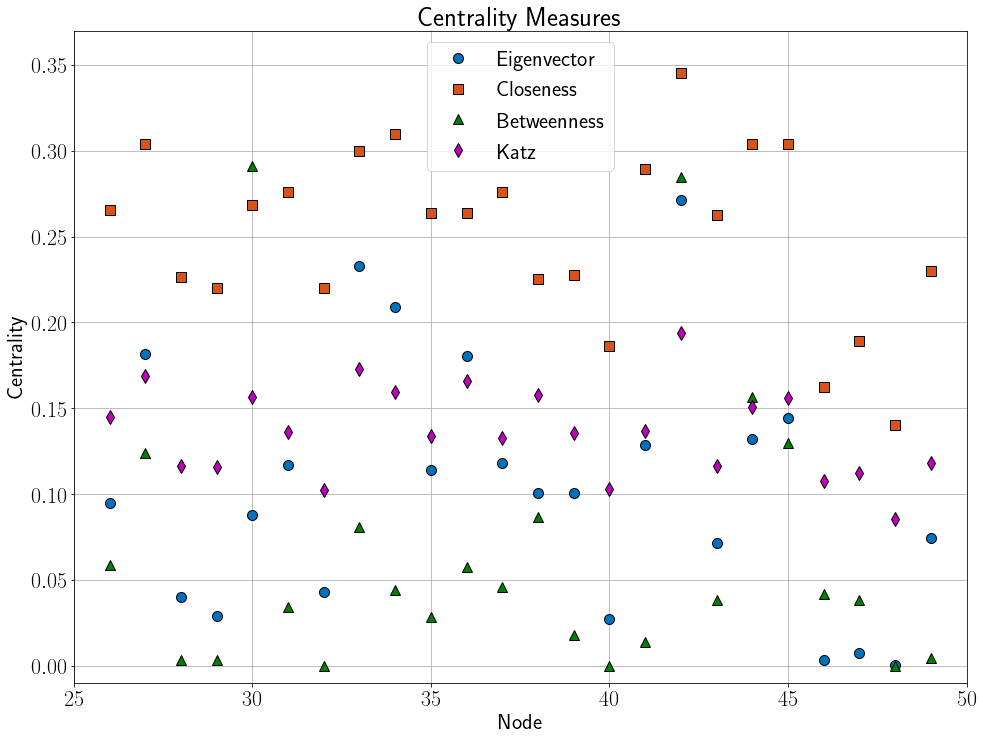

In [10]:
# Eigenvector centrality
ks = np.arange(1,len(G)+1)

fig1 = plt.figure(figsize = (16,12))
plt.plot(ks[:25],Eigenvector[:25],'ko', markersize=10, markerfacecolor=(0, 0.447, 0.741, 1), label='Eigenvector')
plt.plot(ks[:25],Closeness[:25],'ks', markersize=10, markerfacecolor=(0.85, 0.325, 0.098, 1), label='Closeness')
plt.plot(ks[:25],Betweenness[:25],'k^', markersize=10, markerfacecolor='green', label='Betweenness')
plt.plot(ks[:25],Katz[:25],'kd', markersize=10, markerfacecolor='m', label='Katz')
plt.xlabel('Node')
plt.ylabel('Centrality')
plt.title('Centrality Measures')
plt.xlim([0, 26])
plt.ylim([-0.01, 0.37])
plt.legend(loc=0)
plt.grid()

fig1 = plt.figure(figsize = (16,12))
plt.plot(ks[25:],Eigenvector[25:],'ko', markersize=10, markerfacecolor=(0, 0.447, 0.741, 1), label='Eigenvector')
plt.plot(ks[25:],Closeness[25:],'ks', markersize=10, markerfacecolor=(0.85, 0.325, 0.098, 1), label='Closeness')
plt.plot(ks[25:],Betweenness[25:],'k^', markersize=10, markerfacecolor='green', label='Betweenness')
plt.plot(ks[25:],Katz[25:],'kd', markersize=10, markerfacecolor='m', label='Katz')
plt.xlabel('Node')
plt.ylabel('Centrality')
plt.title('Centrality Measures')
plt.xlim([25, 50])
plt.ylim([-0.01, 0.37])
plt.legend(loc=0)
plt.grid()